In [28]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [30]:
# Load and convert the image to grayscale
image_path = '/content/cameraman.jpg'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [31]:
# Step 1: Custom Zero Padding Function
def zero_pad(image, pad_height, pad_width):
    # Create a new array of zeros with the desired padded shape
    padded_image = np.zeros((image.shape[0] + 2 * pad_height, image.shape[1] + 2 * pad_width), dtype=image.dtype)

    # Place the original image in the center of the padded image
    padded_image[pad_height:pad_height + image.shape[0], pad_width:pad_width + image.shape[1]] = image

    return padded_image


In [32]:
# Step 2: Define Gaussian Kernel
def gaussian_kernel(size, sigma):
    if size % 2 == 0:
        size += 1

    kernel = np.zeros((size, size), dtype=np.float32)
    center = size // 2
    normal = 1 / (2.0 * np.pi * sigma**2)

    for x in range(-center, center + 1):
        for y in range(-center, center + 1):
            kernel[x + center, y + center] = normal * np.exp(-(x*2 + y**2) / (2 * sigma*2))

    return kernel / kernel.sum()

# Convolution function using custom zero padding
def convolve(image, kernel):
    kernel_height, kernel_width = kernel.shape
    pad_height, pad_width = kernel_height // 2, kernel_width // 2
    padded_image = zero_pad(image, pad_height, pad_width)
    output = np.zeros_like(image, dtype=np.float32)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            output[i, j] = np.sum(kernel * padded_image[i:i+kernel_height, j:j+kernel_width])

    return output


Add Zero Padding To Original Image:
 [[  0   0   0 ...   0   0   0]
 [  0 157 157 ... 153 155   0]
 [  0 158 158 ... 154 154   0]
 ...
 [  0 129 115 ... 134 113   0]
 [  0 119 137 ... 134 112   0]
 [  0   0   0 ...   0   0   0]]

Gaussian Smoothing:
 [[0.04788226 0.10136675 0.13015749 0.10136675 0.04788226]
 [0.02904206 0.06148205 0.07894451 0.06148205 0.02904206]
 [0.0176149  0.03729074 0.04788226 0.03729074 0.0176149 ]
 [0.01068398 0.02261798 0.02904206 0.02261798 0.01068398]
 [0.00648016 0.0137185  0.0176149  0.0137185  0.00648016]]

Blurred Image:
 [[ 32.000412  43.609943  49.093895 ...  47.65457   42.432434  31.206696]
 [ 58.734306  80.04271   90.10808  ...  87.50298   77.87034   57.2431  ]
 [102.73541  140.00713  157.61302  ... 153.00302  136.1862   100.13023 ]
 ...
 [ 75.60376  102.651276 113.00185  ... 116.31307  105.14146   76.955246]
 [ 74.53592  101.76663  111.42678  ... 120.52966  106.978     76.66246 ]
 [ 66.91014   93.377205 104.34852  ... 110.13986   95.944725  67.91897

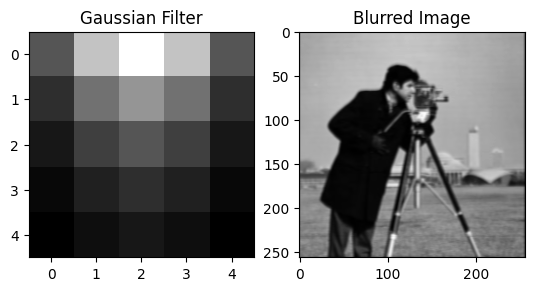

In [33]:
# Apply Zero Padding for Original Image
# Define kernel size
kernel_height, kernel_width = 3, 3
# Calculate padding based on kernel size
pad_height, pad_width = kernel_height // 2, kernel_width // 2
# Apply zero padding to the image
padded_original_image = zero_pad(image, pad_height, pad_width)

print("\nAdd Zero Padding To Original Image:\n", padded_original_image)

# Apply Gaussian Smoothing
gaussian_filter = gaussian_kernel(5, sigma=1.0)
blurred_image = convolve(image, gaussian_filter)

print("\nGaussian Smoothing:\n", gaussian_filter)
print("\nBlurred Image:\n", blurred_image)

# Display Gaussian Filter and Blurred Image
plt.gray()
plt.subplot(121)
plt.imshow(gaussian_filter)
plt.title('Gaussian Filter')
plt.subplot(122)
plt.imshow(blurred_image)
plt.title('Blurred Image')
plt.show()



Add Zero Padding To Blurred Image:
 [[  0.         0.         0.       ...   0.         0.         0.      ]
 [  0.        32.000412  43.609943 ...  42.432434  31.206696   0.      ]
 [  0.        58.734306  80.04271  ...  77.87034   57.2431     0.      ]
 ...
 [  0.        74.53592  101.76663  ... 106.978     76.66246    0.      ]
 [  0.        66.91014   93.377205 ...  95.944725  67.918976   0.      ]
 [  0.         0.         0.       ...   0.         0.         0.      ]]

Gradient in x-Direction (Gx):
 [[ 167.2626     65.56074    21.033272 ...  -19.888412  -63.155636
  -162.7352  ]
 [ 343.70248   134.71863    43.22058  ...  -40.971024 -129.84044
  -334.3593  ]
 [ 500.31424   196.10466    62.91452  ...  -60.506485 -189.71451
  -486.66483 ]
 ...
 [ 408.19308   150.16583    45.728485 ...  -36.853394 -157.7929
  -410.58606 ]
 [ 399.56174   148.6182     41.529793 ...  -45.58245  -169.31311
  -415.04218 ]
 [ 288.52106   111.76762    32.681564 ...  -41.91652  -128.30896
  -298.86743 ]]



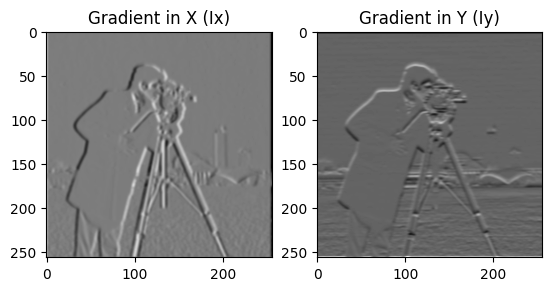

In [34]:
# Apply Zero Padding for Blurred Image
# Define kernel size
kernel_height, kernel_width = 3, 3
# Calculate padding based on kernel size
pad_height, pad_width = kernel_height // 2, kernel_width // 2
# Apply zero padding to the image
padded_blurred_image = zero_pad(blurred_image, pad_height, pad_width)

print("\nAdd Zero Padding To Blurred Image:\n", padded_blurred_image)

# Step 3: Sobel Filters (Gradient Calculation)
Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype=np.float32)

# Convolve with Sobel Kernels
Ix = convolve(blurred_image, Kx)
Iy = convolve(blurred_image, Ky)

print("\nGradient in x-Direction (Gx):\n", Ix)
print("\nGradient in y-Direction (Gy):\n", Iy)

# Display Gradients Ix and Iy
plt.subplot(121)
plt.imshow(Ix)
plt.title('Gradient in X (Ix)')
plt.subplot(122)
plt.imshow(Iy)
plt.title('Gradient in Y (Iy)')
plt.show()

<ipython-input-35-7414d9931367>:2: RuntimeWarning: invalid value encountered in sqrt
  gradient_magnitude = np.sqrt(Ix*2 + Iy*2)


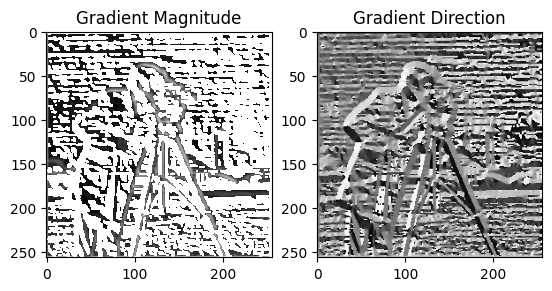

In [35]:
# Step 4: Gradient Magnitude and Direction
gradient_magnitude = np.sqrt(Ix*2 + Iy*2)
gradient_direction = np.arctan2(Iy, Ix) * (180 / np.pi)

# Display Gradient Magnitude and Direction
plt.subplot(121)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.subplot(122)
plt.imshow(gradient_direction, cmap='gray')
plt.title('Gradient Direction')
plt.show()


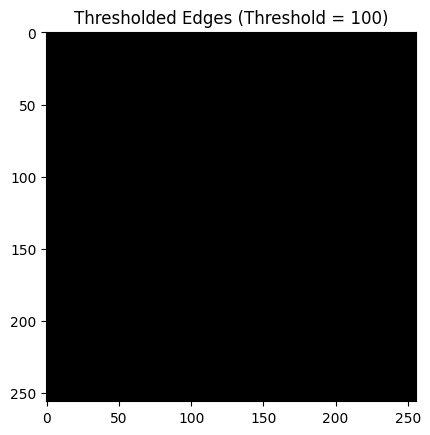


Gradient Magnitude:
 [[      nan       nan       nan ...       nan       nan       nan]
 [14.548903       nan       nan ...       nan       nan       nan]
 [26.522831       nan       nan ...       nan       nan       nan]
 ...
 [28.536741 17.325747 10.172543 ...       nan       nan       nan]
 [29.19668  19.210064 12.416467 ...       nan       nan       nan]
 [32.843857 31.66271  30.601204 ... 29.1369   23.783993       nan]]

Gradient Direction:
 [[-4.97403831e+01 -7.80184402e+01 -8.65645370e+01 ... -9.33446655e+01
  -1.01869537e+02 -1.30231491e+02]
 [-3.46860619e+01 -7.00946960e+01 -8.41516190e+01 ... -9.57104263e+01
  -1.09742744e+02 -1.45290802e+02]
 [-1.65404339e+01 -4.98415833e+01 -7.65748520e+01 ... -1.03218834e+02
  -1.29996231e+02 -1.63503738e+02]
 ...
 [-1.43208414e-01 -2.86412854e-02  7.48960066e+00 ... -1.21131386e+02
  -1.61975174e+02 -1.75954926e+02]
 [ 3.81748104e+00  1.35783453e+01  4.05675278e+01 ...  1.53200302e+02
   1.68774597e+02  1.76240936e+02]
 [ 4.10035019e+01 

In [36]:
# Step 5: Thresholding
def apply_threshold(magnitude, threshold=100):
    thresholded = np.zeros_like(magnitude)
    thresholded[magnitude > threshold] = 255
    return thresholded

# Apply Thresholding to Gradient Magnitude
threshold = 100  # Set a threshold value
edges = apply_threshold(gradient_magnitude, threshold)

# Display Thresholded Edges
plt.imshow(edges, cmap='gray')
plt.title(f'Thresholded Edges (Threshold = {threshold})')
plt.show()

# Print Gradient Magnitude, Direction, and Thresholded Edges
print("\nGradient Magnitude:\n", gradient_magnitude)
print("\nGradient Direction:\n", gradient_direction)
print("\nThresholded Edges:\n", edges)